In [ ]:
from google.colab import files
files.upload()

Saving daily-minimum-temperatures-in-mex (1).csv to daily-minimum-temperatures-in-mex (1) (1).csv


{'daily-minimum-temperatures-in-mex (1).csv': b'Date,Daily minimum temperatures\r\n1/1/1981,20.7\r\n1/2/1981,17.9\r\n1/3/1981,18.8\r\n1/4/1981,14.6\r\n1/5/1981,15.8\r\n1/6/1981,15.8\r\n1/7/1981,15.8\r\n1/8/1981,17.4\r\n1/9/1981,21.8\r\n1/10/1981,20\r\n1/11/1981,16.2\r\n1/12/1981,13.3\r\n1/13/1981,16.7\r\n1/14/1981,21.5\r\n1/15/1981,25\r\n1/16/1981,20.7\r\n1/17/1981,20.6\r\n1/18/1981,24.8\r\n1/19/1981,17.7\r\n1/20/1981,15.5\r\n1/21/1981,18.2\r\n1/22/1981,12.1\r\n1/23/1981,14.4\r\n1/24/1981,16\r\n1/25/1981,16.5\r\n1/26/1981,18.7\r\n1/27/1981,19.4\r\n1/28/1981,17.2\r\n1/29/1981,15.5\r\n1/30/1981,15.1\r\n1/31/1981,15.4\r\n2/1/1981,15.3\r\n2/2/1981,18.8\r\n2/3/1981,21.9\r\n2/4/1981,19.9\r\n2/5/1981,16.6\r\n2/6/1981,16.8\r\n2/7/1981,14.6\r\n2/8/1981,17.1\r\n2/9/1981,25\r\n2/10/1981,15\r\n2/11/1981,13.7\r\n2/12/1981,13.9\r\n2/13/1981,18.3\r\n2/14/1981,22\r\n2/15/1981,22.1\r\n2/16/1981,21.2\r\n2/17/1981,18.4\r\n2/18/1981,16.6\r\n2/19/1981,16.1\r\n2/20/1981,15.7\r\n2/21/1981,16.6\r\n2/22/1981,1

In [ ]:
import pandas as pd

data = pd.read_csv('daily-minimum-temperatures-in-mex (1).csv')
data.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


**Check total null values**

In [ ]:
data.isna().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


**To run the ARIMA model we have to install pmdarima**

In [ ]:
!pip install pmdarima
! pip install statsmodels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


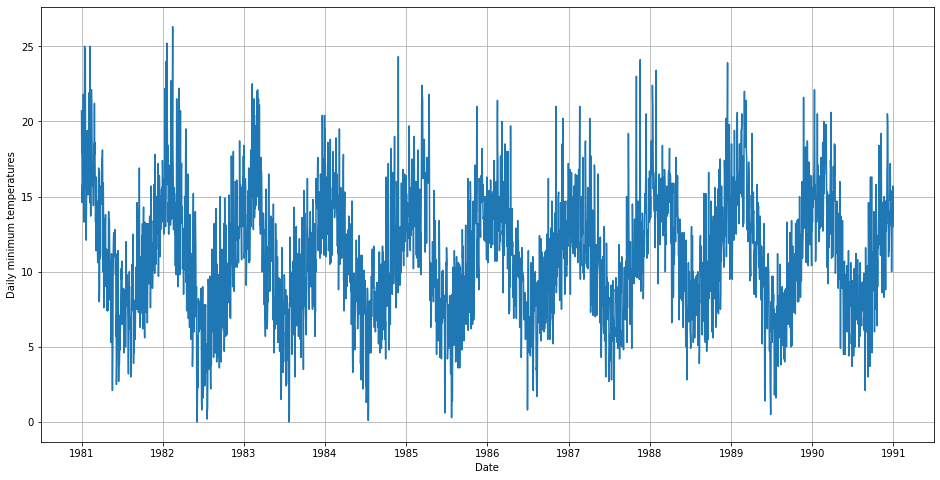

In [ ]:
import matplotlib.pyplot as plt
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv('daily-minimum-temperatures-in-mex (1).csv', sep = ',', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
plt.figure(figsize = (16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Daily minimum temperatures')
plt.plot(data['Daily minimum temperatures']);

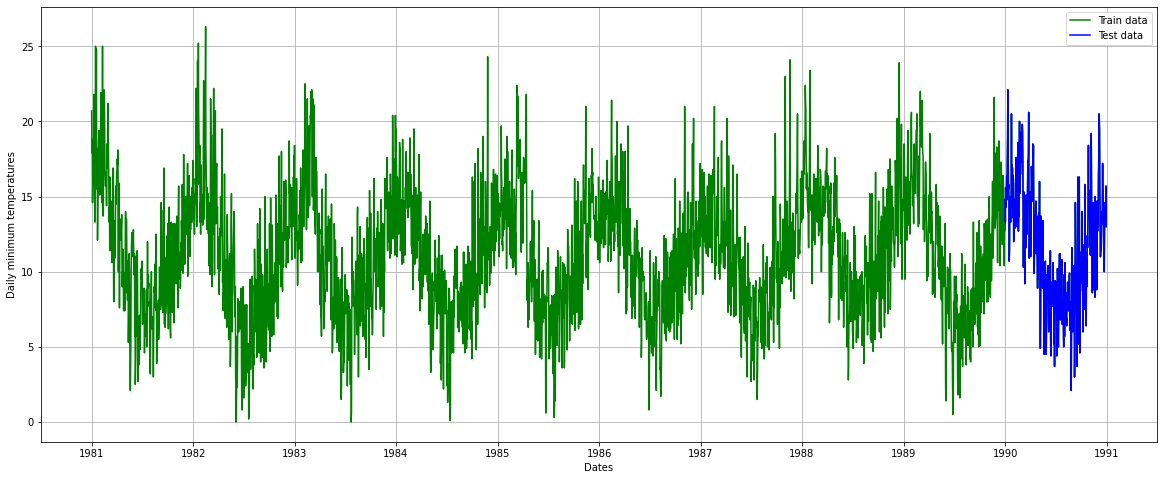

In [ ]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize = (20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Daily minimum temperatures')
plt.plot(data['Daily minimum temperatures'], 'green', label = 'Train data')  
plt.plot(test_data['Daily minimum temperatures'], 'blue', label = 'Test data')        
plt.legend() 

In [ ]:
import statsmodels
from pmdarima import auto_arima

stepwise_fet = auto_arima(data['Daily minimum temperatures'], trace = True, 
                          supress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=5.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16816.370, Time=3.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=4.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.222, Time=6.99 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=5.77 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.46 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=7.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=1.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=1.91 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=16781.448, Time=5.01 sec
 ARIMA(3,0,1)(0,0,0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#Build Model
model = ARIMA(train_data['Daily minimum temperatures'], order = (3,0,1))
fitted = model.fit(disp = -1)
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                                  ARMA Model Results                                  
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3285
Model:                             ARMA(3, 1)   Log Likelihood               -7566.026
Method:                               css-mle   S.D. of innovations              2.421
Date:                        Wed, 07 Jul 2021   AIC                          15144.051
Time:                                19:23:35   BIC                          15180.634
Sample:                                     0   HQIC                         15157.149
                                                                                      
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               11.4366      0.893     12.809      0.000       9.687      13.187
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


<Figure size 1152x576 with 0 Axes>

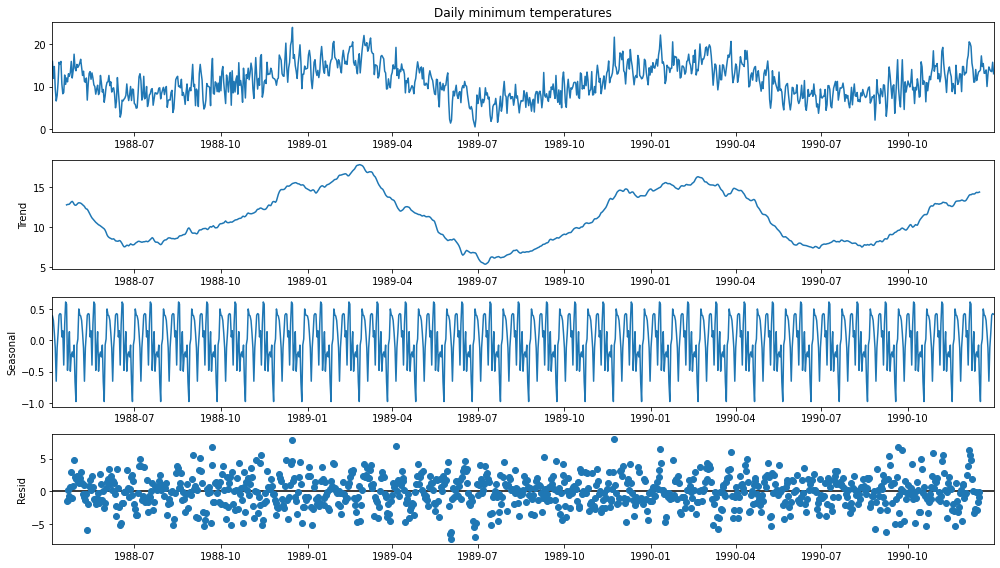

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Daily minimum temperatures']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model = 'additive', freq = 30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima = train_data['Daily minimum temperatures']
test_arima = test_data['Daily minimum temperatures']

history = [x for x in train_arima]
y = test_arima
# make first prediction 
predictions = list()
model = ARIMA(history, order=(0,1,1))
model_fit = model.fit(disp = 0)
ythat = model_fit.forecast()[0]
predictions.append(y[0])
history.append(y[0])
# rolling forecasts

for i in range(1,len(y)):
#predict 
  model = ARIMA(history, order = (0,1,1))
  model_fit = model.fit(disp = 0)
  yhat = model_fit.forecast()[0]
  #invert transformed predictions
  predictions.append(yhat)

  #observation
  obs = y[i]
  history.append(obs)

# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y,predictions))
print('RMSE:'+str(rmse))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE: 6.201410415061175
MAE: 1.8998426389439838
RMSE:2.490263121652243


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


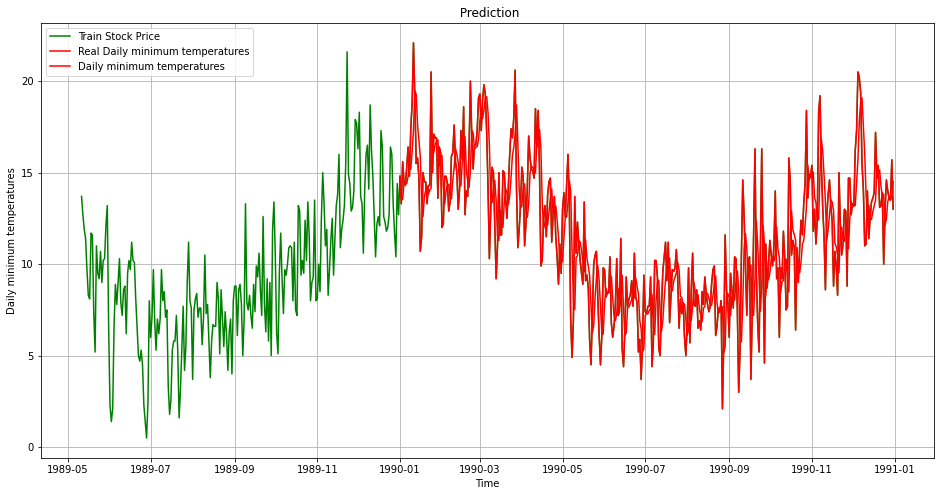

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Daily minimum temperatures'].tail(600),color ='green',label = 'Train Stock Price')
plt.plot(test_data.index,y,color='red',label='Real Daily minimum temperatures')
plt.plot(test_data.index,predictions,color='red',label='Daily minimum temperatures')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('Daily minimum temperatures')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [ ]:
predictions

[14.8,
 array([13.72651917]),
 array([13.53547997]),
 array([14.45085027]),
 array([14.47136287]),
 array([14.39389392]),
 array([14.79505722]),
 array([15.50745849]),
 array([15.19181769]),
 array([16.17220385]),
 array([17.34353109]),
 array([19.48300673]),
 array([19.26479796]),
 array([17.58213644]),
 array([16.78544826]),
 array([15.85022705]),
 array([13.52354299]),
 array([12.59697296]),
 array([13.68483626]),
 array([14.05042254]),
 array([14.25143823]),
 array([13.82159323]),
 array([14.03546818]),
 array([14.15310252]),
 array([17.01151141]),
 array([16.10132043]),
 array([16.54887851]),
 array([16.70588823]),
 array([16.7924027]),
 array([15.35993298]),
 array([15.82545904]),
 array([15.94753291]),
 array([14.17829914]),
 array([13.28566904]),
 array([13.96492989]),
 array([14.3376841]),
 array([14.36424057]),
 array([13.70684067]),
 array([13.56774452]),
 array([14.61056239]),
 array([15.2771354]),
 array([16.3202634]),
 array([15.99554504]),
 array([15.54812481]),
 array([

In [ ]:
test_data['Daily minimum temperatures']

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures, Length: 365, dtype: float64